This notebook continues on from '2-mush-obs-images.ipynb' where I downloaded images into classes. This notebook will begin training and testing classification models on the image data. 

## Setting Up the Workspace

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#!pip install fastai --upgrade -q

In [2]:
from fastai.vision.all import * # for ease of use
from fastai.data.all import *
from fastai.metrics import error_rate
import os, math, numpy, pandas as pd

In [3]:
# For mounting google drive

#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#datapath = Path('/content/drive/MyDrive/Colab Notebooks/mushroom-proj/data')
datapath = Path.cwd() / 'data'
datapath

Path('/notebooks/storage/mushroom_obs/data')

In [5]:
mushroom_images = Path(datapath/'mushroom-images')

### Model Number 2: Resnet50 

In the last notebook I trained a classifier to filter out images of spores/microscopy images, or any other image that wasn't actually of a mushroom. I then created a separate test set and trained resnet34 to 62% accuracy across 992 species of mushroom. In this notebook I will try using Resnet50. 

### Models to Predict a Mushroom Species from its Image

I'm using an 80:10:10 split for training, validation, and test sets. The test data was set aside manually in notebook 3, and I will use the FastAI Datablock API for training and validation splits. By using a random seed, the validation set used will also be identical across the different models.  

In [6]:
# get further 11.1 % of training set as 10 % test set
valid_pct = 0.1111 # percentage to take from training to make overall test set 10%

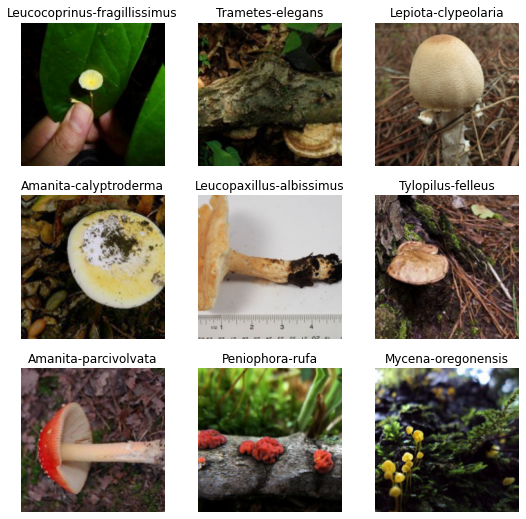

In [7]:
# function to process filenames (Path objects) into class labels

mushroom_db = DataBlock(blocks = (ImageBlock, CategoryBlock), # inputs are images, outputs are categoriesb
                   get_items = get_image_files,   # get images from folder names
                   get_y = parent_label,          # get labels by processing filename
                   splitter = RandomSplitter(valid_pct=valid_pct, seed=0),
                   item_tfms = Resize(224),       # resize all images to 224 x 224
                   batch_tfms = aug_transforms()) # augment images to improve generalisation
mushroom_dl = mushroom_db.dataloaders(mushroom_images)
mushroom_dl.show_batch(max_n=9)


## Training Xresnet50

Now that we have our data split correctly into training, validation, and test sets, we can begin training and evaluating models. Xresnet50 is a pre trained model with adjustments made to the model architecture and training schedule as described in: https://cs.nju.edu.cn/wujx/paper/AAAI2021_Tricks.pdf

In [8]:
learn = Learner(mushroom_dl, xresnet50(pretrained=True), metrics=accuracy)

In [9]:
learn.fine_tune(7, freeze_epochs=3, cbs=SaveModelCallback(monitor='valid_loss', fname='species-xresnet50'))

epoch,train_loss,valid_loss,accuracy,time
0,5.065235,5.354298,0.093829,28:16
1,4.009130,4.623479,0.166667,28:25
2,3.064893,2.943673,0.377940,28:05


Better model found at epoch 0 with valid_loss value: 5.354297637939453.
Better model found at epoch 1 with valid_loss value: 4.62347936630249.
Better model found at epoch 2 with valid_loss value: 2.9436733722686768.


/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/learner.py:54: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,accuracy,time
0,2.247493,2.667801,0.433868,28:00
1,2.251406,2.733589,0.418076,27:59
2,1.988403,2.369199,0.482264,28:07
3,1.608707,2.122301,0.536880,28:01
4,1.285820,1.858544,0.588921,28:10
5,1.030398,1.752192,0.616472,28:25
6,0.851305,1.736467,0.623275,28:21


Better model found at epoch 0 with valid_loss value: 2.6678011417388916.
Better model found at epoch 2 with valid_loss value: 2.369198799133301.
Better model found at epoch 3 with valid_loss value: 2.122300863265991.
Better model found at epoch 4 with valid_loss value: 1.8585436344146729.
Better model found at epoch 5 with valid_loss value: 1.7521919012069702.
Better model found at epoch 6 with valid_loss value: 1.7364672422409058.


In [9]:
learn.load('species-xresnet50')

/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/learner.py:54: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [10]:
learn.export('models/species-xresnet50_EXPORT.pkl')

### XResnet18

Now i'll try using xresnet18 instead of xresnet50:

In [11]:
learn = Learner(mushroom_dl, xresnet18(), metrics=accuracy)

In [11]:
learn.fine_tune(14, freeze_epochs=6, cbs=SaveModelCallback(monitor='valid_loss', fname='species-xresnet18'))

epoch,train_loss,valid_loss,accuracy,time
0,6.057903,6.041403,0.035326,10:28
1,5.245525,5.444212,0.068707,09:33
2,4.551708,4.900083,0.119874,10:48
3,3.862596,4.216136,0.195432,10:10
4,3.274918,3.627411,0.273178,10:35
5,2.723191,2.703482,0.412099,10:52


Better model found at epoch 0 with valid_loss value: 6.041403293609619.
Better model found at epoch 1 with valid_loss value: 5.444212436676025.
Better model found at epoch 2 with valid_loss value: 4.900083065032959.
Better model found at epoch 3 with valid_loss value: 4.2161359786987305.
Better model found at epoch 4 with valid_loss value: 3.627410650253296.
Better model found at epoch 5 with valid_loss value: 2.703482151031494.


epoch,train_loss,valid_loss,accuracy,time
0,2.132581,2.436668,0.465160,09:31
1,2.060205,2.427544,0.467153,10:22
2,2.028564,2.457505,0.466132,11:03
3,1.976660,2.426000,0.468659,11:16
4,1.883680,2.456921,0.471817,09:34
5,1.720458,2.305691,0.498542,09:57
6,1.533686,2.287026,0.509329,09:28
7,1.351686,2.316252,0.510641,09:28
8,1.168384,2.160016,0.543294,09:28
9,1.021644,2.143673,0.554762,09:28


Better model found at epoch 0 with valid_loss value: 2.4366679191589355.
Better model found at epoch 1 with valid_loss value: 2.427543878555298.
Better model found at epoch 3 with valid_loss value: 2.425999641418457.
Better model found at epoch 5 with valid_loss value: 2.3056905269622803.
Better model found at epoch 6 with valid_loss value: 2.2870261669158936.
Better model found at epoch 8 with valid_loss value: 2.16001558303833.
Better model found at epoch 9 with valid_loss value: 2.1436731815338135.
Better model found at epoch 10 with valid_loss value: 2.0923891067504883.
Better model found at epoch 11 with valid_loss value: 2.0775697231292725.
Better model found at epoch 13 with valid_loss value: 2.0545594692230225.


So we have tried a few different models and the best so far has been resnet34 using transfer learning. 

In [12]:
learn.load('species-xresnet18')

/opt/conda/envs/fastai/lib/python3.8/site-packages/fastai/learner.py:54: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [13]:
learn.export('models/species-xresnet18_EXPORT.pkl')